In [1]:
import pandas as pd
import numpy as np
from umap import UMAP
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.cluster import DBSCAN
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
state = 43

In [2]:
data = normalize(pd.read_csv('GSE121861_syngeneic_expression.csv', header=None))
data, data.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (10473, 27998))

In [3]:
genes = pd.read_csv('GSE121861_syngeneic_row_data.csv')['GeneSymbol']
genes

0                  Xkr4
1                Gm1992
2               Gm37381
3                   Rp1
4                   Rp1
              ...      
27993        AC168977.1
27994              PISD
27995             DHRSX
27996          Vmn2r122
27997    CAAA01147332.1
Name: GeneSymbol, Length: 27998, dtype: object

In [4]:
splitter = KFold()
train_idcs, test_idcs = next(splitter.split(data))
training, test = data[train_idcs], data[test_idcs] 

# Clustering

In [5]:
reducer = UMAP(n_neighbors=5, random_state=state)
train_trans = reducer.fit_transform(training)
test_trans = reducer.transform(test) 

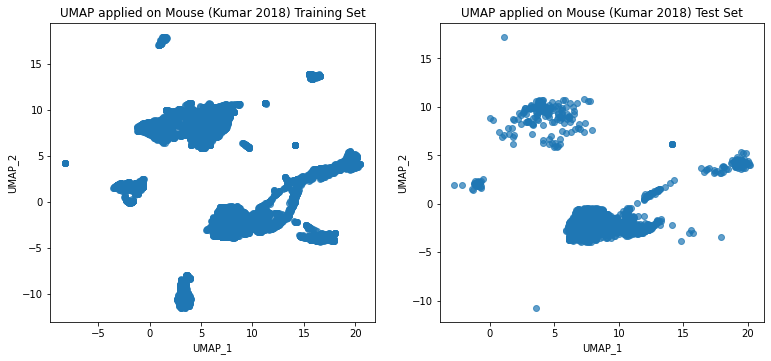

In [6]:
fig, canv = plt.subplots(1, 2, figsize=(12.8, 5.5))

canv[0].scatter(
    train_trans[:, 0], # first column as X
    train_trans[:, 1], # second column as Y
    alpha=.7
)
canv[0].set_xlabel("UMAP_1")
canv[0].set_ylabel("UMAP_2")
canv[0].set_title("UMAP applied on Mouse (Kumar 2018) Training Set")

canv[1].scatter(
    test_trans[:, 0], # first column as X
    test_trans[:, 1], # second column as Y
    alpha=.7
)
canv[1].set_xlabel("UMAP_1")
canv[1].set_ylabel("UMAP_2")
canv[1].set_title("UMAP applied on Mouse (Kumar 2018) Test Set");

plt.show()

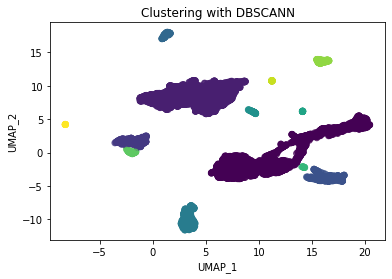

In [7]:
clustering = DBSCAN().fit(train_trans)
plt.scatter(
    train_trans[:, 0],
    train_trans[:, 1],
    alpha=.7,
    c=clustering.labels_
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("Clustering with DBSCANN");

# Classification

In [8]:
classifier = SGDClassifier(random_state=state)
classifier.fit(training, clustering.labels_)

SGDClassifier(random_state=43)

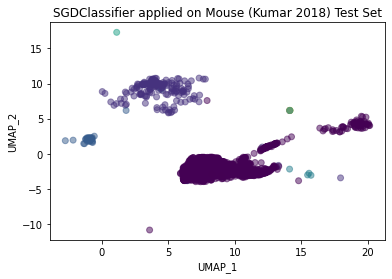

In [9]:
labels = classifier.predict(test)
plt.scatter(
    test_trans[:, 0],
    test_trans[:, 1],
    alpha=.5,
    c=labels
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("SGDClassifier applied on Mouse (Kumar 2018) Test Set");

In [10]:
classifier = RandomForestClassifier(random_state=state).fit(training, clustering.labels_)

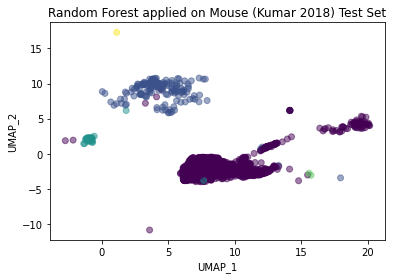

In [11]:
labels = classifier.predict(test)
plt.scatter(
    test_trans[:, 0],
    test_trans[:, 1],
    alpha=.5,
    c=labels
)
plt.xlabel("UMAP_1")
plt.ylabel("UMAP_2")
plt.title("Random Forest applied on Mouse (Kumar 2018) Test Set");